## Notes are based on Chapter 6 of *Ace the Data Science interview*
## Statistics housekeeping


Mean    $$ \mu = E[X] = \int xp(x)dx$$

Variance    $$ Var(X)= \sigma^2(X) = E[(X - \mu)^2] = \int (x-\mu_x)^2 p(x)dx $$

Standard Deviation    $$ \sigma(X) = \sqrt{Var{X}}$$

Covariance    $$ \text{Cov}(X,Y) = E[(X-\mu_x)(Y - \mu_y)] = E[XY] - E[X]E[Y]$$

Correlation    coefficient $$ \rho(X,Y) = \frac{ Cov(X,Y)}{\sqrt{Var(X)Var(Y)}} \in [-1,1] $$

## Law of Large number
If define $ \mu_X = mean(X_{1,...n}) = \frac{X_1 + X_2+... + X_n}{n}  $


$$ \mu(\mu_X)\rightarrow \mu,  n \rightarrow \infty $$

$$ \sigma^2(\mu_X) \sim \frac{\sigma^2}{n} \rightarrow 0, n \rightarrow \infty $$

### Central limit theorem $$\Rightarrow \mu_X \sim N(\mu, \sigma^2/n)$$


# Example
* Sampling from an arbitary distribution
* Different outcomes of subsample and bootstrap.

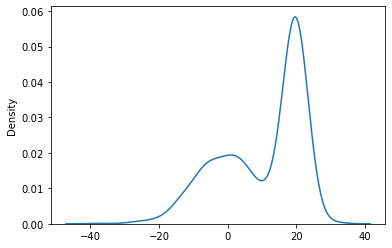

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def bimodalGaussian(N, mu1,sigma1, mu2, sigma2):
    X1 = np.random.normal(mu1, sigma1, N//2)
    X2 = np.random.normal(mu2, sigma2, N - len(X1))
    X = np.concatenate([X1, X2])
    sns.kdeplot(X)
    return X

N = 1000
mu1, sigma1 = 0, 10 
mu2, sigma2 = 20, 2
X = bimodalGaussian(N, mu1,sigma1, mu2, sigma2)

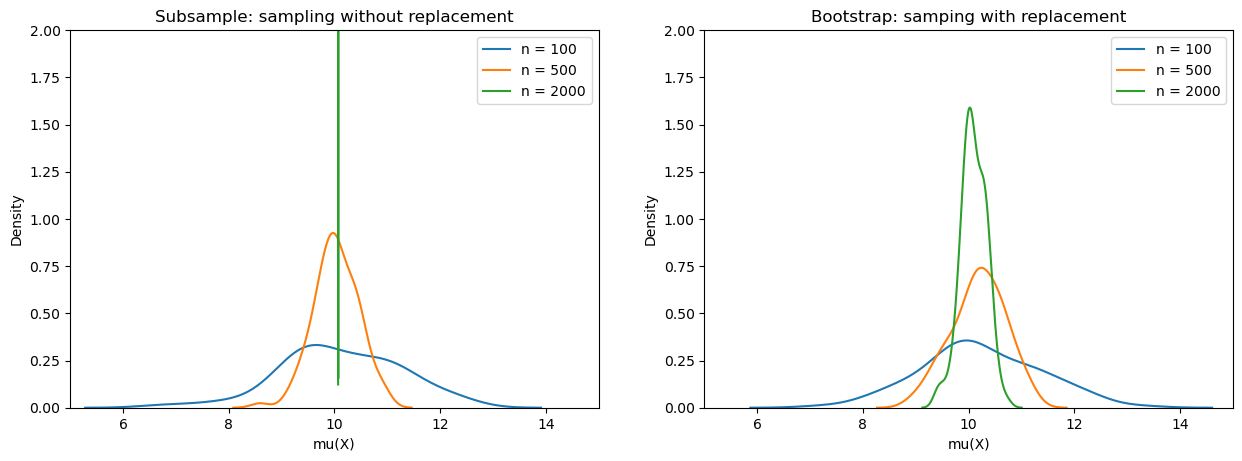

In [ ]:
def sampling(X, n, nrepeats=100, with_replacement = False):
    """"
    Sampling from a known dataset X
    Args: n sample size, nrepeats: sampling repeats, 
            with_replacement: False, True for boostrap
    Returns:
         sampled dataset Xs of Xs.shape = (n, nrepeats)
    """
    np.random.seed(42)
    N = len(X)
    Xs = np.empty((n,nrepeats))
    for r in range(nrepeats):
        if with_replacement:
            ind = np.random.randint(low = 0, high= N, size = n)
            Xs[:,r] = X[ind]
        else:
            if n<N:
                ind = np.random.permutation(N)
                Xs[:,r] = X[ind[:n]]
            else:
                Xs[:,r] = np.nan
                Xs[:N,r] = X[:]+1.0e-3*np.random.randn()
    return Xs

ns = (np.array([0.1, 0.5, 2.0])*len(X)).astype(int)
nrepeats = 100
fig, ax = plt.subplots(1,2, figsize=(15,5), dpi=100)
for n in ns:
    Xs = sampling(X, n, nrepeats, False)
    mu_X = np.nanmean(Xs, axis = 0)
    sns.kdeplot(mu_X, ax = ax[0], label=f'n = {n}');
    Xs = sampling(X, n, nrepeats, True)
    mu_X = np.nanmean(Xs, axis = 0)
    sns.kdeplot(mu_X, ax = ax[1], label=f'n = {n}');
ax[0].set(xlim = (5,15), ylim=(0,2), xlabel = 'mu(X)', title='Subsample: sampling without replacement')
ax[1].set(xlim = (5,15), ylim=(0,2), xlabel = 'mu(X)', title='Bootstrap: samping with replacement');
ax[0].legend(),ax[1].legend();

# Notes:
* Population mean $\mu_X$ (sample can be from any distribution) can be approximated by the Normal distribution when sample size is large enough.( Central limit theorem)
* The more samples, the more accurate estimated mean. Its uncertainty is indicated by Confidence interval (CI), or restate that the true mean ($\mu$) has 95% chance within this window
$$95\% CI :  \Pr(-c\leq T\leq c)=0.95  $$

where $$T = \frac{\mu_X - \mu}{S/\sqrt{n}} \sim t_{n-1} distribution$$
For normal distribution, or as $n$ is large enough 

$$95\% CI : c \approx 1.96 $$

$$\mu_X \in \mu  \pm 1.96 \cdot \frac{S}{\sqrt{n}}$$

* sample variance 
$$ S^2 = \frac{\sum(x_i - \bar{x})^2}{(n-1)} $$
* Bootstrapping trades between limited sample sizes and estimation accuracy.

# Hypothesis testing:
Null assumption: H0

To reject H0 is to state that, under the null assumption, the observed is a rare case with probability of p-value ( <0.05, or set threshold). 

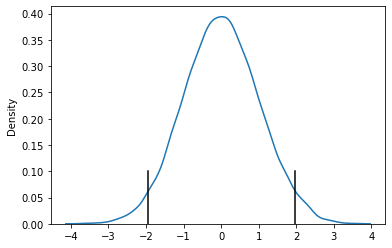

In [ ]:
# z-distribution

N = 20000
mu, sigma = 0, 1
X = np.random.normal(mu, sigma, N)
sns.kdeplot(X);
plt.plot([1.96*sigma,1.96*sigma],[0,0.1],'k-')
plt.plot([-1.96*sigma,-1.96*sigma],[0,0.1],'k-');

## Question # 6.5.
Facebook: Say you flip a coin 10 times and observe only one heads. What would be your null hypothesis and p-value for testing whether the coin is fair or not?

## Answer:
The null hypothesis is that the coin is fair, and the alternative hypothesis is that the coin is biased:

$$ H0: p = 0.5,  H1: p \neq 0.5$$

Note that, since the sample size here is 10, you cannot apply the Central Limit Theorem (and so you cannot approximate a binomial using a normal distribution).
The p-value here is the probability of observing the results obtained given that the null hypothesis is true, i.e., under the assumption that the coin is fair. In total for 10 flips of a coin, there are 2^10 = 1024 possible outcomes, and in only 10 of them are there 9 tails and one heads. Hence, the exact probability of the given result is the p-value, which is $ \frac{10}{1024}= 0.0098$. Therefore, with a significance level set, for example, at 0.05, we can reject the null hypothesis.

## Common distributions:
* Bernoulli distritbuion: 
    * Total outcome of binary event. 
    * Example: 
        * Head counts of throwing a biased coin ($p\neq 0.5$) for N times.
        * click through rate
* Z-distribution: 
    * equivalent to normal distribution after transfer
    * Mean of large sample values, accordign the CLT
    * Standard error of the mean (SEM): measures how much discrepancy is likely in a sample's mean compared with the true population mean $\mu$.
    * SEM is ~ $\sigma/\sqrt{n}$, scaled with the true population standard variance $\sigma$
* T-distribution: 
    * Mean of small sample size
    * SEM is ~ $S/\sqrt{n}$
* Chi-squared distribution
    * how much off your observation is deviated from expected.
       $$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i^2}$$
    * Example: outcome of biased coin deviated from that of an unbiased coin.

# A/B testing
### Random sampling ratio and the Power of test

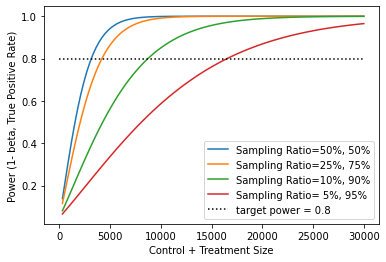

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from statsmodels.stats.power import tt_ind_solve_power

def test_ttest_power_diff(
    mean_diff,
    std,
    sample_size_total= None,
    alpha=0.05,
    desired_power=0.8,
    ratios=[1, 0.5] ):
    """
    calculates power functions for different bucket ratios with the same mean diff and std.
    Args:
        mean_diff: the mean difference between control and treatment buckets
        std: standard deviation
        sample_size_total: sample size of control + sample size of treatment
        alpha: alpha indicats the desired type I error rate
        desired_power: the desired power. Need this value to mark on the graph
        ratios: a list of bucket ratios to compare
    return: None
    """
    fig, _ = plt.subplots()

    for ratio in ratios:
        effect_size = mean_diff / std
        sizes = np.append(
            np.arange( 
                round(sample_size_total / 100),
                sample_size_total,
                round(sample_size_total / 100),
            ), sample_size_total)
        
        powers = []
        for sample_size_total in sizes:
            sample1_size = sample_size_total / (1 + ratio)
            assert sample1_size + sample1_size * ratio == sample_size_total
            power = tt_ind_solve_power(
                effect_size=effect_size, 
                nobs1=sample1_size,
                alpha=alpha, 
                ratio=ratio,
            )
            powers.append(power)


        #plt.title("Power vs. Sample Size")
        plt.xlabel("Control + Treatment Size")
        plt.ylabel("Power (1- beta, True Positive Rate)")

        plt.plot(sizes, powers,
                label="Sampling Ratio={:2.0f}%, {:2.0f}%".format(
                round((1 - 1 / (ratio + 1)) * 100), 
                round(1 / (ratio + 1) * 100)), )
    plt.plot([0, sample_size_total], [desired_power, desired_power], 'k:', label = 'target power = 0.8')
    plt.legend()
    #fig.savefig(file_path)

test_ttest_power_diff(
    mean_diff = 1,
    std=10.0,
    sample_size_total= 1e4,
    ratios=[1.0/1.0, 1.0/3.0, 1.0/9.0,5/95],
)